### Problem Statement - Predict the onset of diabetes based on diagnostic measures

#### Introduction
The Pima are a group of Native Americans living in Arizona. A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. In the recent years, because of a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, made them develop the highest prevalence of type 2 diabetes and for this reason they have been subject of many studies.

#### Dataset Description

The dataset describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes within few years.

It includes data from 768 women with 8 characteristics:

Fields description follow:

PregnantFreq = Number of times pregnant

PlasmaGlucose = Plasma glucose concentration in 2 hours in an oral glucose tolerance test

DiastolicBP = Diastolic blood pressure (mm Hg)

TricepSkinThickness = Triceps skin fold thickness (mm)

SerumInsulin = 2-Hour serum insulin (mu U/ml)

BMI = Body mass index (weight in kg/(height in m)^2)

DiabetesPedigree = Diabetes pedigree function

Age = Age (years)

Target = Class variable (1: tested positive for diabetes, 0: tested negative for diabetes)

In [1]:
# conda install graphviz ## Installation of graphviz for visualization of deciscion tree

# step-1...Import necessary libraries

In [2]:
### Load the required libraries

import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
import seaborn
from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error
from sklearn import tree

# Step-2 .... Load the data

### Reading data with predefined column names

In [3]:
labels = ["Pregnant", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

diabetes = pd.read_csv("diabetes.csv",names=labels)
diabetes.head()

,Pregnant,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Top 5 rows of data set

# step-3... Data Exploration (EDA)

### Check summary statistics

In [4]:
diabetes.describe()

,Pregnant,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Check if the data types are as expected

In [5]:
diabetes.dtypes

Pregnant                      int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#### Changing "Target" datatype to categorical

In [6]:
diabetes['Outcome'] = diabetes['Outcome'].astype('category')

### Check target distribution

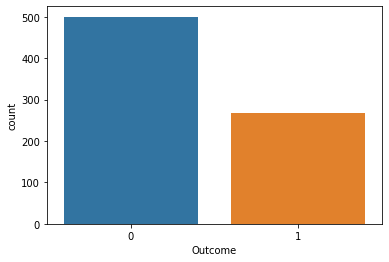

In [7]:
import seaborn as sns
sns.countplot(diabetes['Outcome'])

#### Correlation Matrix

In [8]:
corr = diabetes.corr()
corr

,Pregnant,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


#### Correlation Plot

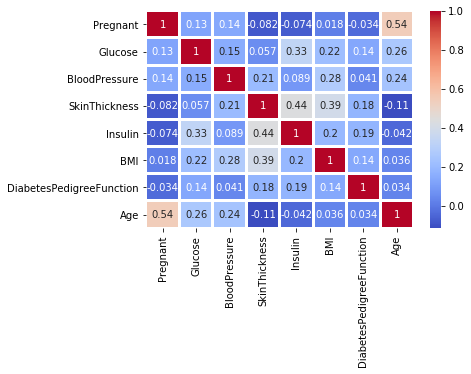

In [9]:
fig, ax = plt.subplots()
#fig.set_size_inches(15, 10)
sns.heatmap(corr,cmap='coolwarm',annot=True,linewidths=2)

### Decouple target from the features

In [10]:
X = diabetes[diabetes.columns.difference(['Outcome'])]  ## Select all columns except "Target"
print(X.shape)
y = diabetes['Outcome']
print(y.shape)

(768, 8)
(768,)


### Test-Train split

In [11]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (537, 8)
y_train (537,)
X_test (231, 8)
y_test (231,)


# Decision Trees

In [13]:
X_train.head()

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnant,SkinThickness
334,22,23.9,60,0.260,95,58,1,18
139,28,36.9,72,0.159,105,325,5,29
485,24,42.3,68,0.365,135,250,0,42
547,28,33.1,68,0.160,131,166,4,21
18,33,43.3,30,0.183,103,83,1,38


In [14]:
diabetes.dtypes

Pregnant                       int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                     category
dtype: object

### Model 1 - default parameters

In [15]:
## import required library
from sklearn import tree
## Instantiating DecisionTree-Classifier
dt1_gini = tree.DecisionTreeClassifier()  
 ## Training Model by fit method
dt1_gini.fit(X_train, y_train)            

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Checking accuracy

In [16]:
print('Train Accuracy =',dt1_gini.score(X_train, y_train))
print('Test Accuracy =',dt1_gini.score(X_test, y_test))

Train Accuracy = 1.0
Test Accuracy = 0.7056277056277056


## Confusion Matrix and Classification Report

In [17]:
from sklearn.metrics import confusion_matrix


print("Train - Confusion Matrix")
print(confusion_matrix(y_train,dt1_gini.predict(X_train)))

print("Test - Confusion Matrix")
print(confusion_matrix(y_test,dt1_gini.predict(X_test)))

Train - Confusion Matrix
[[349   0]
 [  0 188]]
Test - Confusion Matrix
[[110  41]
 [ 27  53]]


## Important variables

In [32]:
features = X_train.columns
importances = dt1_gini.feature_importances_
indices = np.argsort(importances)[::-1]
x = pd.DataFrame([X_train.columns[indices],np.sort(importances)[::-1]])

In [34]:
x

,0,1,2,3,4,5,6,7
0,Glucose,BMI,Age,BloodPressure,DiabetesPedigreeFunction,SkinThickness,Insulin,Pregnant
1,0.357444,0.196235,0.121402,0.0988337,0.0947931,0.0705671,0.0365392,0.0241858


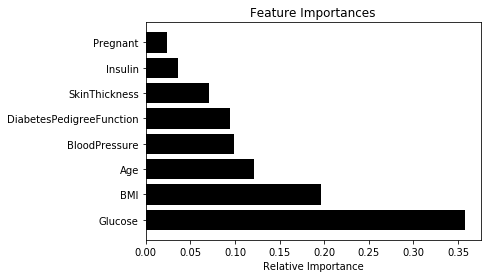

In [37]:
fig, ax = plt.subplots()
plt.title('Feature Importances')
plt.barh(range(len(indices)), x.iloc[1,:], color='black')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Building Decision Tree Model using Variable Importance

In [21]:
indices

array([4, 1, 0, 2, 3, 7, 5, 6], dtype=int64)

In [22]:
select = indices[0:5]
imp_tree = tree.DecisionTreeClassifier(max_depth=3)   ## Instantiating DecisionTree-Classifier
clf = imp_tree.fit(X_train.iloc[:,select], y_train)

In [23]:
train_pred = imp_tree.predict(X_train.iloc[:,select])
test_pred = imp_tree.predict(X_test.iloc[:,select])

### Checking accuracy

In [24]:
print('Train Accuracy =',imp_tree.score(X_train.iloc[:,select], y_train))
print('Test Accuracy =',imp_tree.score(X_test.iloc[:,select], y_test))

Train Accuracy = 0.7635009310986964
Test Accuracy = 0.7186147186147186


## Confusion Matrix and Classification Report

In [25]:
from sklearn.metrics import confusion_matrix


print("Train - Confusion Matrix")
print(confusion_matrix(y_train,imp_tree.predict(X_train.iloc[:,select])))

print("Test - Confusion Matrix")
print(confusion_matrix(y_test,imp_tree.predict(X_test.iloc[:,select])))

Train - Confusion Matrix
[[342   7]
 [120  68]]
Test - Confusion Matrix
[[141  10]
 [ 55  25]]


### Model 2
1. Entropy based splits
2. Max tree depth = 5

In [26]:
## Instantiating the object
dt2_entropy = tree.DecisionTreeClassifier(criterion='entropy',max_depth =5)
## Train the model
dt2_entropy.fit(X_train, y_train)
print('Train Accuracy =',dt2_entropy.score(X_train, y_train))
print('Test Accuracy =',dt2_entropy.score(X_test, y_test))

Train Accuracy = 0.819366852886406
Test Accuracy = 0.7748917748917749


dot_data = tree.export_graphviz(dt2_entropy, out_file=None,feature_names=X.columns,filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("dt2_entropy_maxdept5") 

### Model 3
1. Entropy based splits
2. max_leaf_nodes

In [27]:
dt3_fraction15 = tree.DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=5)
dt3_fraction15.fit(X_train, y_train)
print('Train Accuracy =',dt3_fraction15.score(X_train, y_train))
print('Test Accuracy =',dt3_fraction15.score(X_test, y_test))

Train Accuracy = 0.7597765363128491
Test Accuracy = 0.7186147186147186


### Which model/parameters to choose for best accuracy?
### Will the model be really stable?

## Randomized Hyper-parameter search with cross-validation

In [28]:
# Randomized search on hyper parameters

from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree

dt = tree.DecisionTreeClassifier() 

param_grid = {'criterion':['gini','entropy'],
             'max_leaf_nodes': np.arange(5,30,1),
             'max_depth':np.arange(3,15,1),
             }


rsearch_acc = RandomizedSearchCV(estimator=dt, param_distributions=param_grid,n_iter=500)
rsearch_acc.fit(X_train, y_train)

print(rsearch_acc.best_estimator_)
print('Train Accuracy =',rsearch_acc.best_score_)
print('Test Accuracy =',rsearch_acc.score(X_test, y_test))

print("Train - Confusion Matrix")
print(confusion_matrix(y_train,rsearch_acc.predict(X_train)))
print("Test - Confusion Matrix")
print(confusion_matrix(y_test,rsearch_acc.predict(X_test)))


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=11, max_features=None, max_leaf_nodes=9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Train Accuracy = 0.7672377985462097
Test Accuracy = 0.7229437229437229
Train - Confusion Matrix
[[274  75]
 [ 37 151]]
Test - Confusion Matrix
[[107  44]
 [ 20  60]]


# Step-5....Conclusion

In [ ]:
Hyper parameter tunning gives us the best parameters like max_depth=11,max_leaf_nodes=9,'criterion'='entropy'
In this case we got the train accuracy as 0.767 and test accuracy as 0.722.
here train accuracy and test accuracy are good and high,so we can call it as a best fit model